In [ ]:
import pandas as pd
import re
import nltk 
nltk.download('stopwords')
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.feature_extraction.text import *

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Test.csv to Test.csv
Saving Train.csv to Train.csv


In [ ]:
import io

Test_Dataset = pd.read_csv(io.BytesIO(uploaded['Test.csv']))
Train_Dataset = pd.read_csv(io.BytesIO(uploaded['Train.csv']),encoding="ISO-8859-1")



In [ ]:
Test_Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3798 entries, 0 to 3797
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       3798 non-null   int64 
 1   ScreenName     3798 non-null   int64 
 2   Location       2964 non-null   object
 3   TweetAt        3798 non-null   object
 4   OriginalTweet  3798 non-null   object
 5   Sentiment      3798 non-null   object
dtypes: int64(2), object(4)
memory usage: 178.2+ KB


In [ ]:
Train_Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


In [ ]:
Train_Dataset = Train_Dataset.drop(columns='Location')
Test_Dataset = Test_Dataset.drop(columns='Location')

In [ ]:
#Combining the Train and test set for data pre-processing
All_Tweets = Train_Dataset.append(Test_Dataset, ignore_index=True) 
All_Tweets.shape

(44955, 5)

In [ ]:
#Removing unwanted symbols 
ct = re.compile("(@[A-Za-z0-9]+)|(#[A-Za-z0-9]+)|([^0-9A-Za-z t])|(http\S+)")
tweets = []
for tweet in All_Tweets["OriginalTweet"]:
    tweets.append(ct.sub(" ", tweet))
All_Tweets = pd.concat([All_Tweets, pd.DataFrame(tweets, columns=["CleanedTweet"])], axis=1, sort=False)
All_Tweets.head()

,UserName,ScreenName,TweetAt,OriginalTweet,Sentiment,CleanedTweet
0,3799,48751,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,Gahan and and
1,3800,48752,16-03-2020,advice Talk to your neighbours family to excha...,Positive,advice Talk to your neighbours family to excha...
2,3801,48753,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,Coronavirus Australia Woolworths to give elde...
3,3802,48754,16-03-2020,My food stock is not the only one which is emp...,Positive,My food stock is not the only one which is emp...
4,3803,48755,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative,Me ready to go at supermarket during the ou...


In [ ]:
# Removing short words
All_Tweets["CleanedTweet"] = All_Tweets["CleanedTweet"].apply(lambda x: " ".join([w for w in x.split() if len(w)>2]))

In [ ]:
#Mapping Sentiments to numerical values
All_Tweets['label'] = All_Tweets['Sentiment'].map({'Extremely Negative':0,'Negative':0,'Neutral':1,'Positive':2,'Extremely Positive':2})

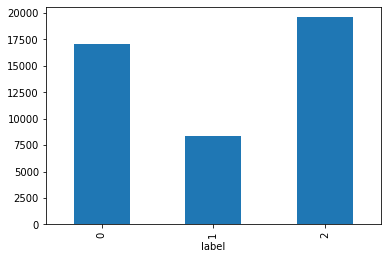

In [ ]:
All_Tweets.groupby("label").label.count().plot.bar(ylim=0)

In [ ]:
#Mapping Sentiments to numerical values
Train_Dataset['label'] = Train_Dataset['Sentiment'].map({'Extremely Negative':0,'Negative':0,'Neutral':1,'Positive':2,'Extremely Positive':2})

In [ ]:
stop_words = set(stopwords.words('english'))     # make a set of stopwords
vectoriser = CountVectorizer(max_df=0.90, min_df=3, max_features=4000, stop_words= stop_words)
DTM = vectoriser.fit_transform(All_Tweets["CleanedTweet"])
 


In [ ]:
# Extracting train and test features
Train_set = DTM[:41157,:] 

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Train_set, Train_Dataset['label'], test_size=0.33)

In [ ]:
#Using Naive Bayes
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

classifier = MultinomialNB()
classifier.fit(X_train, y_train)

# Prediction
prediction = classifier.predict(X_test)

print("Accuracy of the prediction: " + str(accuracy_score(y_test, prediction)*100))


Accuracy of the prediction: 69.14298336032985
